# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

In [22]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split# < импортируем функцию train_test_split из библиотеки sklearn >
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV  
# import matplotlib.pyplot as plt 
from sklearn import metrics, model_selection
from sklearn.datasets import load_breast_cancer
from sklearn import tree

In [23]:
from joblib import dump

In [24]:
df = pd.read_csv('/datasets/users_behavior.csv') 
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [26]:
count_smart = len(df[df['is_ultra']==0])
count_ultra = len(df[df['is_ultra']==1])
pct_smart = count_smart/(count_smart+count_ultra)
print("Процент пользователей Смарт", pct_smart*100)
pct_ultra = count_ultra/(count_smart+count_ultra)
print("Процент пользователей Ультра", pct_ultra*100)

Процент пользователей Смарт 69.35283136278781
Процент пользователей Ультра 30.647168637212197


In [27]:
df['is_ultra'].value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

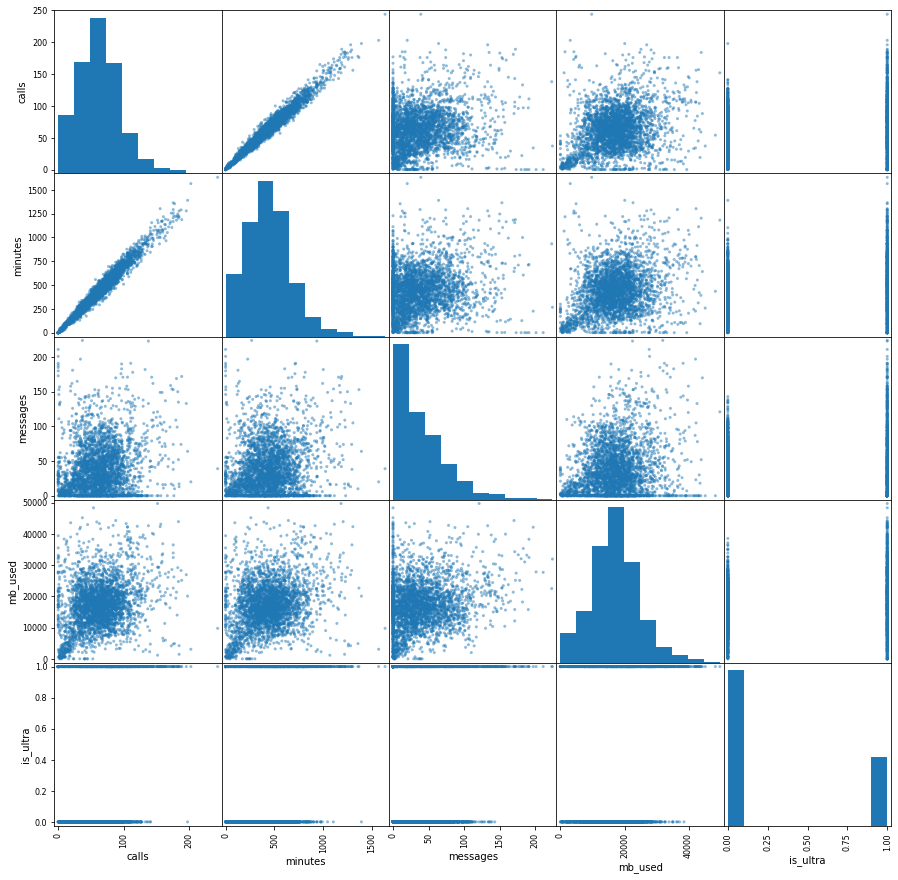

In [28]:
pd.plotting.scatter_matrix(df,figsize=(15,15));

## Разбейте данные на выборки

In [29]:

df_train, df_test1 =train_test_split(df, test_size=0.4, random_state=12345)
df_test, df_valid=train_test_split(df_test1, test_size=0.5, random_state=12345)

In [30]:
df_train.shape[0]



1928

In [31]:
df_test.shape[0]

643

In [32]:
df_valid.shape[0]

643

In [33]:
features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']

In [34]:
features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']

In [35]:
features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']

## Исследуйте модели

Настроим гиперпараметр дерева решений.
Поменяем гиперпараметр max_depth от 1 до 9 в цикле. Для каждого значения напечатаем на экране качество на валидационной выборке

In [36]:
for depth in range(1, 30):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth )# обучите модель с заданной глубиной дерева
    model.fit(features_train, target_train) # обучите модель
    predictions_valid = model.predict(features_valid)
    print("max_depth =", depth, ": ", end='')
    print(accuracy_score(target_valid, predictions_valid))


max_depth = 1 : 0.7356143079315708
max_depth = 2 : 0.7744945567651633
max_depth = 3 : 0.7791601866251944
max_depth = 4 : 0.7744945567651633
max_depth = 5 : 0.7838258164852255
max_depth = 6 : 0.776049766718507
max_depth = 7 : 0.7993779160186625
max_depth = 8 : 0.7931570762052877
max_depth = 9 : 0.7807153965785381
max_depth = 10 : 0.7884914463452566
max_depth = 11 : 0.7744945567651633
max_depth = 12 : 0.7807153965785381
max_depth = 13 : 0.7713841368584758
max_depth = 14 : 0.76049766718507
max_depth = 15 : 0.7713841368584758
max_depth = 16 : 0.749611197511664
max_depth = 17 : 0.7480559875583204
max_depth = 18 : 0.749611197511664
max_depth = 19 : 0.7433903576982893
max_depth = 20 : 0.7325038880248833
max_depth = 21 : 0.7387247278382582
max_depth = 22 : 0.7293934681181959
max_depth = 23 : 0.7293934681181959
max_depth = 24 : 0.7309486780715396
max_depth = 25 : 0.7309486780715396
max_depth = 26 : 0.7309486780715396
max_depth = 27 : 0.7309486780715396
max_depth = 28 : 0.7309486780715396
max_de

In [37]:
# выведем 4 варианта глубины дерева, что построить по этим моделям plot_tree
for depth in range(1, 5):
    model1 = DecisionTreeClassifier(random_state=12345, max_depth=depth )# обучите модель с заданной глубиной дерева
    model1.fit(features_train, target_train) # обучите модель
    predictions_valid = model1.predict(features_valid)
    print("max_depth =", depth, ": ", end='')
    print(accuracy_score(target_valid, predictions_valid))


max_depth = 1 : 0.7356143079315708
max_depth = 2 : 0.7744945567651633
max_depth = 3 : 0.7791601866251944
max_depth = 4 : 0.7744945567651633


Самой большой доли правильных ответов модель достигла при значении гиперпараметра глубины равной 7 и 8.


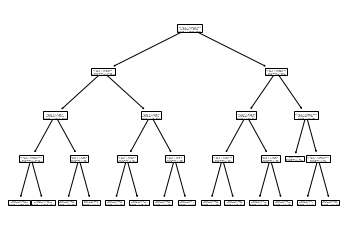

In [38]:
tree.plot_tree(model1);

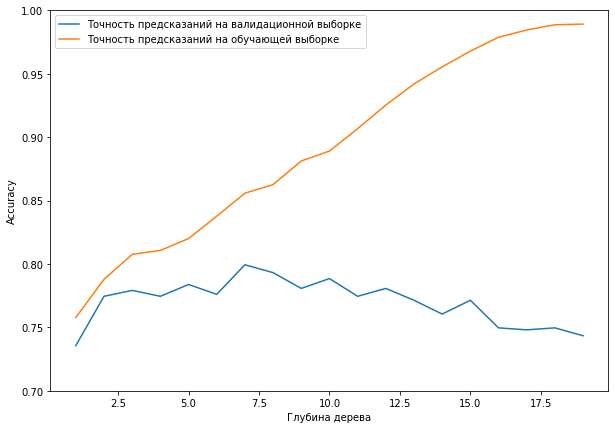

In [39]:


acc_valid = [] # сюда записывается accuracy по валидационной
acc_train = [] # сюда записывается accuracy по обучающей

depth_ = 20

for depth in range(1, depth_):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_tree.fit(features_train, target_train)
    
    predictions_valid = model_tree.predict(features_valid)
    predictions_train = model_tree.predict(features_train)
    
#     собираем результаты в списки
    acc_valid.append(accuracy_score(target_valid, predictions_valid))   
    acc_train.append(accuracy_score(target_train, predictions_train))   
    
    
fig, ax = plt.subplots(figsize = (10, 7))
fig.suptitle('')

# строи по спискам графики
ax.plot(np.arange(1, depth_), acc_valid, )
ax.plot(np.arange(1, depth_), acc_train)

ax.set_xlabel('Глубина дерева')
ax.set_ylabel('Accuracy')

ax.legend(['Точность предсказаний на валидационной выборке', 'Точность предсказаний на обучающей выборке'])

plt.ylim(0.7, 1);  

Попробуем новый алгоритм классификации — случайный лес.Обучим модели случайного леса с числом деревьев от 1 до 10.

In [40]:
best_model_rf = None
best_result = 0
for est in range(1, 11):
    model = RandomForestClassifier(random_state=12345, n_estimators=est) # обучим модель с заданным количеством деревьев
    model.fit(features_train, target_train) # обучим модель на тренировочной выборке
    result = model.score(features_valid, target_valid) # посчитаем качество модели на валидационной выборке
    if result > best_result:
        best_model_rf = model# сохраним наилучшую модель
        best_result = result#  сохраним наилучшее значение метрики accuracy на валидационных данных

print("Accuracy наилучшей модели на валидационной выборке:", best_result)

Accuracy наилучшей модели на валидационной выборке: 0.7869362363919129


In [41]:
%%time
best_model_rf = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(10, 51, 1):
    for depth in range (1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        # обучим модель на тренировочной выборке
        result = model.score(features_valid, target_valid)
        if result > best_result:
            best_model_rf = model
            best_result = result
            best_est = est
            best_depth = depth
print("Accuracy наилучшей модели на валидационной выборке:", best_result, "Количество деревьев:", best_est, "Максимальная глубина:", depth)            
            
        
        
        
        
        

Accuracy наилучшей модели на валидационной выборке: 0.8149300155520995 Количество деревьев: 14 Максимальная глубина: 10
CPU times: user 32.6 s, sys: 245 ms, total: 32.8 s
Wall time: 32.9 s


Доля правильных ответов все равно меньше, чем для дерева решений. Попробуем еще один алгоритм - логистическая регрессия.

In [42]:
model.fit(features_train, target_train) # обучим модель на тренировочной выборке
result = model.score(features_valid, target_valid)
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model.fit(features_train, target_train)
# model.predict(new_item)
model.score(features_valid, target_valid)
# Напишите код здесь

#dump(model, 'model_9_1.joblib')

0.6842923794712286

In [43]:
model = LogisticRegression(random_state=12345, solver='liblinear',class_weight='balanced')
parameters = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

grid_clf = GridSearchCV(model, parameters, cv=5, scoring='accuracy')
target_concat = pd.concat([target_train] +[target_valid]) 
features_concat = pd.concat([features_train] +[features_valid]) 
grid_clf.fit(features_concat, target_concat)

print(grid_clf.best_estimator_)
print(grid_clf.best_params_)
print(grid_clf.best_score_)


/opt/conda/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.9/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.9/site-packages/scipy/optimize/_l

LogisticRegression(class_weight='balanced', random_state=12345,
                   solver='newton-cg')
{'solver': 'newton-cg'}
0.63787465528314


Исправила скоринг и переобучила модель на конкатенированном наборе данных

In [44]:

best_model_lr = None
best_result = 0
best_c = 0.0
for C in np.arange(1, 50, 0.1) :
    model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced', C=C, penalty = 'l2', l1_ratio = 0) #
                               
                               
    # обучим модель с заданным количеством деревьев
    model.fit(features_train, target_train) # обучим модель на тренировочной выборке
    result = model.score(features_valid, target_valid) # посчитаем качество модели на валидационной выборке
    if result > best_result:
        best_model_lr = model# сохраним наилучшую модель
        best_result = result
        best_c = C#  сохраним наилучшее значение метрики accuracy на валидационных данных
print("Accuracy наилучшей модели на валидационной выборке:", best_result, 'параметр C:', best_c) 

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/opt/conda/lib/python3.9/site-packages/sklearn/l

Accuracy наилучшей модели на валидационной выборке: 0.6298600311041991 параметр C: 8.100000000000007


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/opt/conda/lib/python3.9/site-packages/sklearn/l

In [45]:
best_model_lr = None
best_result = 0
best_ratio = 0
# best_ratio.astype(float) 
for ratio in np.arange(0, 1, 0.01):
    model = LogisticRegression(random_state=12345, solver='liblinear',class_weight='balanced', C=8.1, penalty = 'l2', l1_ratio = ratio) # обучим модель с заданным количеством деревьев
    model.fit(features_train, target_train) # обучим модель на тренировочной выборке
    result = model.score(features_valid, target_valid) # посчитаем качество модели на валидационной выборке
    if result > best_result:
        best_model_lr = model# сохраним наилучшую модель
        best_result = result
        best_ratio = ratio#  сохраним наилучшее значение метрики accuracy на валидационных данных
print("Accuracy наилучшей модели на валидационной выборке:", best_result, 'l1_ratio:', best_ratio) 

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
/opt/conda/lib/python3.9/site-packages/sklearn/l

Accuracy наилучшей модели на валидационной выборке: 0.6236391912908242 l1_ratio: 0.0


In [46]:
classifier = LogisticRegression(solver='lbfgs',random_state=0)
classifier.fit(features_valid, target_valid)

LogisticRegression(random_state=0)

Ответы на вопросы :
1. Чем глубже вы позволяете своему дереву расти, тем сложнее становится ваша модель, потому что у вас будет больше разбиений, и она будет собирать больше информации о данных, и это является одной из основных причин перенастройки в деревьях решений, потому что ваша модель будет идеально подходит для тренировочных данных и не сможет хорошо обобщать результаты тестов. Таким образом, если ваша модель переоснащается, уменьшение числа для max_depth является одним из способов борьбы с переобучением. 

2.Как ни странно, приверженность деревьев к переобучению играет положительную роль. Они, во-первых, получаются довольно разнообразными и, во-вторых, описывают самые разные исходы для входных векторов . Затем, при усреднении результатов, эффект переобучения естественным образом нивелируется (уменьшается) и итоговое выходное значение оказывается достаточно точным и устойчивым к отдельным выбросам. В ряде задач точность оказывается выше всех других подходов машинного обучения. Именно поэтому бутстрэп быстро завоевал свою популярность.
Чтобы решающие деревья получались еще более разнообразными и формировали менее зависимые ответы, предлагается при их обучении в каждой промежуточной вершине случайным образом отбирать некоторое количество признаков  и уже среди них отбирать лучшие для ветвления. Наборы из таких деревьев называют случайным лесом
3.В линейной регрессии выход является взвешенной суммой входных данных. Логистическая регрессия - это обобщенная линейная регрессия в том смысле, что мы не выводим взвешенную сумму входных данных напрямую, а пропускаем ее через функцию, которая может отображать любое действительное значение в диапазоне от 0 до 1.
    Если мы возьмем взвешенную сумму входных данных в качестве выходных данных, как в линейной регрессии, значение может быть больше 1, но мы хотим, чтобы значение было от 0 до 1. Поэтому линейная регрессия не может использоваться для задач классификации.
4. Я думаю, что в данном случае логистическая регрессия показала плохой результат, так как она плохо работает в задачах, в которых зависимость ответов от признаков сложная, нелинейная

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>


Успех:


Дополню чуть

1. Верно, переобучение. На train точность растет вплоть до 100%. 
    
    
2. Я напишу короче ) В RF обучается несколько деревьев, а решение принимается путем голосования. Каждое дерево в RF учится на своем датасете (используется техника бутстрап), таким образом достигается "независимость" этих самых деревьев, в итоге ошибка разброса снижается.

    
3. Верно. "Регрессия", потому что внутри нее скалярное произведение (как и в линейной регрессии), дающее на выходе вещественное число (от + бесконечности до - бесконечности), на это число вешают сигмойду, логарифм и получают значение от 0 до 1 (вероятность класса).   
    
    
4. Правильно. Логистическая регрессия плоха (и хороша с другой стороны) тем что это линейный классификатор: обьекты на классы разделяем гиперплоскостью (прямой если на плоскости), а в данном датасете видимо более сложные, нелинейные связи между признаками и таргетом.   А RF с DT с этим справляются. На других данных  LR могла оказаться лучше, например потому что RF не может экстраполировать. 


</div>

## Проверьте модель на тестовой выборке

In [47]:
    model = DecisionTreeClassifier(random_state=12345, max_depth=7 )# обучите модель с заданной глубиной дерева
    model.fit(features_train, target_train) # обучите модель
    predictions_test = model.predict(features_test)
   # print("max_depth =", depth, ": ", end='')
    print(accuracy_score(target_test, predictions_test))

0.7822706065318819


In [48]:
#проверим работу модели, обученной на комплексе обучающей и валидационной выборок  
model = DecisionTreeClassifier(random_state=12345, max_depth=7 )# обучите модель с заданной глубиной дерева
target_concat = pd.concat([target_train] +[target_valid]) 
features_concat = pd.concat([features_train] +[features_valid]) 
model.fit(features_concat, target_concat)# обучите модель
predictions_test = model.predict(features_test)
# print("max_depth =", depth, ": ", end='')
print(accuracy_score(target_test, predictions_test))

0.7916018662519441


In [49]:
model = RandomForestClassifier(random_state=12345, n_estimators=14, max_depth=10)
model.fit(features_train, target_train)
        # обучим модель на тренировочной выборке
result = model.score(features_test, target_test)
result

0.7916018662519441

In [50]:
#проверим работу модели, обученной на комплексе обучающей и валидационной выборок
model = RandomForestClassifier(random_state=12345, n_estimators=14, max_depth=10)
target_concat = pd.concat([target_train] +[target_valid]) 
features_concat = pd.concat([features_train] +[features_valid]) 
model.fit(features_concat, target_concat)
result = model.score(features_test, target_test)
result

0.8055987558320373

Действительно, при изменении размера обучающй выборки точность модели увеличивается.

Полученный в нашем проекте результат можно использовать например для интеллектуальной системы рекомендации тарифов, исходя из желаний и потребностей пользователя

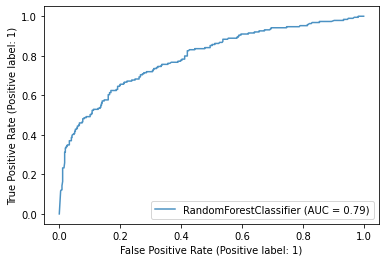

In [51]:
#визуализируем работу модели с помощью метода metrics. Построим кривую ROC

features,target = load_breast_cancer(return_X_y = True)
clf = RandomForestClassifier(random_state=12345, n_estimators=14, max_depth=10)
clf.fit(features_train, target_train)
ax = plt.gca()
metrics.plot_roc_curve(clf, features_test, target_test,ax=ax, alpha=0.8)
#svc_disp.plot(ax=ax, alpha=0.8)
plt.show()

На тестовой выборке было использовано две модели, показавшие наилучшие результаты на валидационной выборке. В результате использования моделей случайный лес и дерево решений, наилучший результат показал случайный лес 0.79,но и дерево решений дало долю правильных ответов 0.78,что не противоречит требуемому порогу accuracy=0.75



## (бонус) Проверьте модели на адекватность

In [52]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent').fit(features_train, target_train)
dummy_pred = dummy.predict(features_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
print('Test score: ', accuracy_score(target_test, dummy_pred))


Unique predicted labels:  [0]
Test score:  0.7060653188180405


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [ ] Весь код исполняется без ошибок
- [ ] Ячейки с кодом расположены в порядке исполнения
- [ ] Выполнено задание 1: данные загружены и изучены
- [ ] Выполнено задание 2: данные разбиты на три выборки
- [ ] Выполнено задание 3: проведено исследование моделей
    - [ ] Рассмотрено больше одной модели
    - [ ] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [ ] Написаны выводы по результатам исследования
- [ ] Выполнено задание 3: Проведено тестирование
- [ ] Удалось достичь accuracy не меньше 0.75
